# Monte Carlo

## Loterie
### Cílem simulace je zjistit jak roste pravděpodobnost výhry s počtem vsazených sloupců

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

Šance na trefení alespoň 4 čísel pro 1 sloupec = 0.018754%
Šance na trefení alespoň 4 čísel pro 2 sloupec = 0.036863%
Šance na trefení alespoň 4 čísel pro 3 sloupec = 0.054891%
Šance na trefení alespoň 4 čísel pro 4 sloupec = 0.072317%
Šance na trefení alespoň 4 čísel pro 5 sloupec = 0.089755%
Šance na trefení alespoň 4 čísel pro 6 sloupec = 0.106438%
Šance na trefení alespoň 4 čísel pro 7 sloupec = 0.123616%
Šance na trefení alespoň 4 čísel pro 8 sloupec = 0.13953%
Šance na trefení alespoň 4 čísel pro 9 sloupec = 0.155525%
Šance na trefení alespoň 4 čísel pro 10 sloupec = 0.172044%


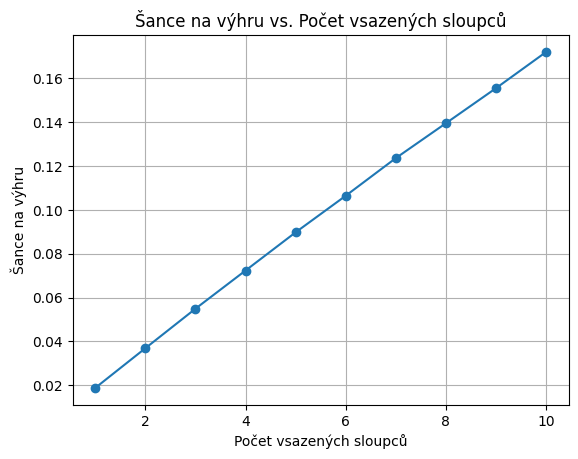

In [2]:
import numpy as np

def generate_winning_ticket():
    return np.sort(np.random.choice(range(1, 50), size=6, replace=False))

def generate_human_tickets(num_columns):
    tickets = []
    for _ in range(num_columns):
        ticket = np.sort(np.random.choice(range(1, 50), size=6, replace=False))
        tickets.append(ticket)
    return tickets

def compare_tickets(winning_ticket, betting_tickets):
    num_matching_numbers = np.zeros(len(betting_tickets))
    for i, ticket in enumerate(betting_tickets):
        num_matching_numbers[i] = len(np.intersect1d(winning_ticket, ticket))
    return num_matching_numbers

def simulate_lottery(num_simulations, max_columns):
    probabilities = []
    for num_columns in range(1, max_columns + 1):
        total_cost = num_simulations * num_columns * 20
        total_winnings = 0
        total_wins = 0
        for _ in range(num_simulations):
            winning_ticket = generate_winning_ticket()
            human_tickets = generate_human_tickets(num_columns)
            matching_numbers = compare_tickets(winning_ticket, human_tickets)
            winnings = np.array([0, 0, 0, 100, 1000, 50000, 1000000])  # Prize amounts for matching 0 to 6 numbers
            total_winnings += np.sum(winnings[matching_numbers.astype(int)])
            if any(matching_numbers >= 3):
                total_wins += 1
        average_winnings = total_winnings / num_simulations
        probability_of_winning = total_wins / num_simulations
        print('Šance na trefení alespoň 4 čísel pro {} sloupec = {}%'.format(num_columns, probability_of_winning))
        probabilities.append(probability_of_winning)
        
    return probabilities

num_simulations = 1000000
max_columns = 10  # Adjust this based on your preference
probabilities = simulate_lottery(num_simulations, max_columns)

plt.plot(range(1, max_columns + 1), probabilities, marker='o')
plt.xlabel('Počet vsazených sloupců')
plt.ylabel('Šance na výhru')
plt.title('Šance na výhru vs. Počet vsazených sloupců')
plt.grid(True)
plt.show()
